In [54]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [55]:
hb = pd.read_csv('D:\\haberman.csv')


In [56]:
hb

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [57]:
print(hb.shape)

(306, 4)


In [58]:
print(hb.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [59]:
hb['status'].value_counts()



1    225
2     81
Name: status, dtype: int64

Data obtained is an imbalanced data set

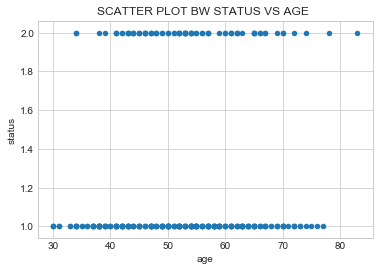

In [60]:
hb.plot(kind='scatter',y='status',x='age')
plt.title('SCATTER PLOT BW STATUS VS AGE ')

plt.show()

### If ageisless than 35 ,then there is a chance of survival and When age is >78 ,chances ofsurvival is zero

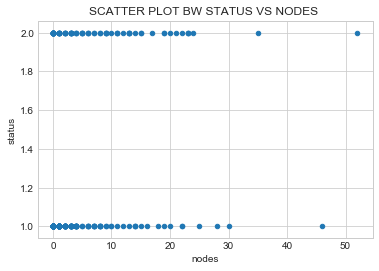

In [61]:
hb.plot(kind='scatter',y='status',x='nodes')
plt.title('SCATTER PLOT BW STATUS VS NODES ')

plt.show()


### Cannot be concluded based on the number of nodes

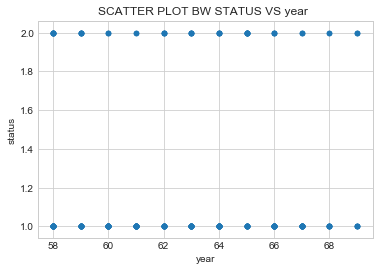

In [62]:
hb.plot(kind='scatter',x='year',y='status')
plt.title('SCATTER PLOT BW STATUS VS year ')
plt.show()


### cannot be concluded based on the year

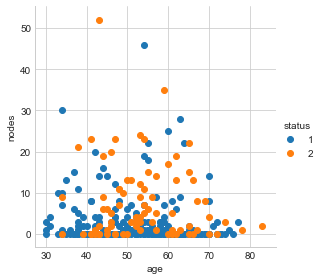

In [63]:
sns.set_style("whitegrid");
sns.FacetGrid(hb, hue="status", size=4) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();

plt.show();


### nodes vs age 
This bivariate analysis bw nodes and age cannnot differentiate surviavl status 1 and surviavl status 2.

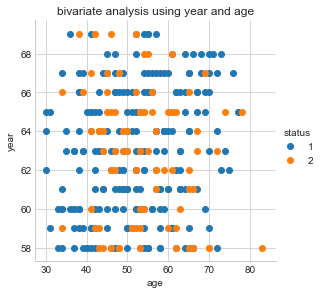

In [64]:
sns.set_style("whitegrid");
sns.FacetGrid(hb, hue="status", size=4) \
   .map(plt.scatter, "age", "year") \
   .add_legend();
plt.title('bivariate analysis using year and age')
plt.show();


### when age is approximately less than 35,then  survival status is 1.Nothing more cannot be concluded from this analysis

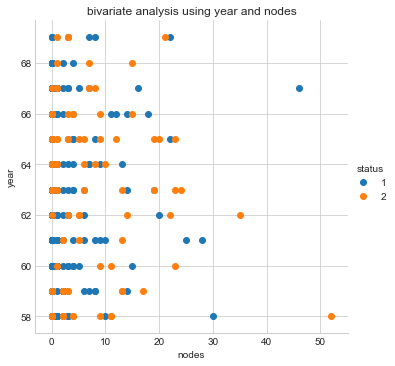

In [65]:
sns.set_style("whitegrid");
sns.FacetGrid(hb, hue="status", size=5) \
   .map(plt.scatter,"nodes", "year") \
   .add_legend();
plt.title('bivariate analysis using year and nodes')
plt.show();


 ### Nothing can be concluded from this aanalysis.Differentiation of status is not possible.

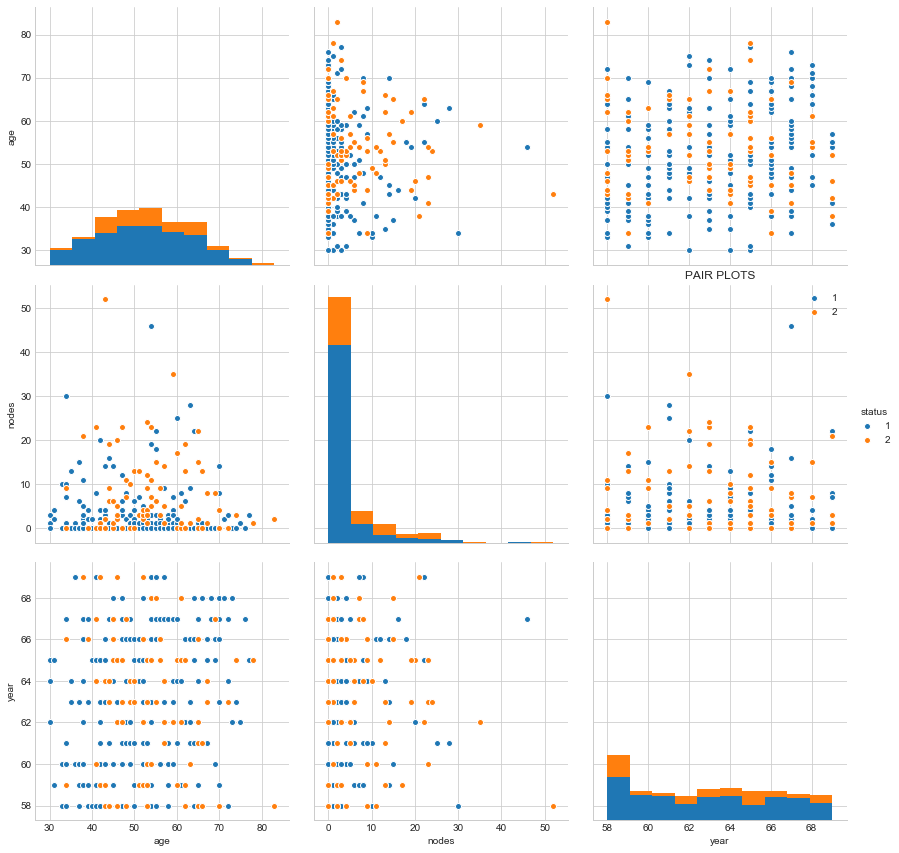

In [66]:
plt.close();

sns.set_style("whitegrid");

sns.pairplot(hb, hue="status",vars=['age','nodes','year'] ,size=4);
plt.title("PAIR PLOTS")

plt.legend()

plt.show()

#### In the plot between age and status,when age is approximately less than 35,then survival staus is 1 
#### nothing more cannot be concluded from rest of the plots using this analysis

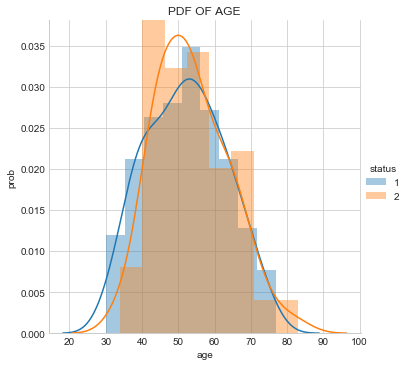

In [108]:

sns.FacetGrid(hb, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title("PDF OF AGE")
plt.ylabel('prob')

plt.show();


### From the graph above,nothing is concluded as there is a overlapping.But there are minor chances that when age less than 35 survival status is 1,and survival status is 2 when age is greater than 84

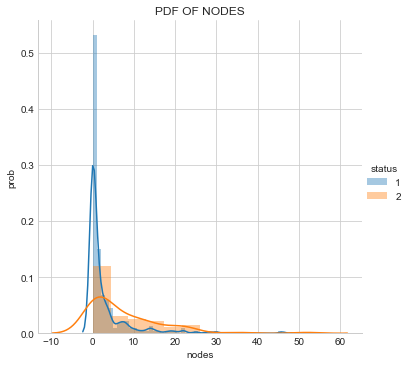

In [107]:
sns.FacetGrid(hb, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title("PDF OF NODES")
plt.ylabel('prob')
plt.show();

### From Above graph,based on number of nodes,no differentiation can be made.There is no point on either of the axes  where you can differentiate both statuses based on no: of nodes

In [69]:
hb_1 = hb.loc[hb["status"] == 1];
hb_2 = hb.loc[hb["status"] == 2];

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


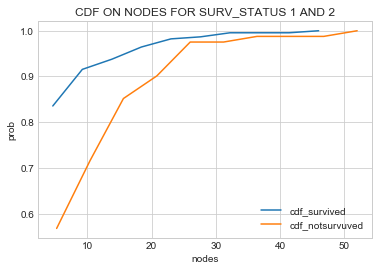

In [104]:
# status1
counts, bin_edges = np.histogram(hb_1['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
#plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf,label='cdf_survived')


#status2
counts, bin_edges = np.histogram(hb_2['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
#plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf,label='cdf_notsurvuved')
plt.title('CDF ON NODES FOR SURV_STATUS 1 AND 2')
plt.xlabel('nodes')
plt.ylabel('prob')
plt.legend()



plt.show();

In [ ]:
when number of nodes > 45 then the survival status is 2(not survived)

[0.02222222 0.03111111 0.04444444 0.06222222 0.04444444 0.08
 0.04       0.05333333 0.09777778 0.06666667 0.07555556 0.08888889
 0.04888889 0.04444444 0.08       0.03111111 0.02222222 0.04
 0.01333333 0.01333333]
[30.   32.35 34.7  37.05 39.4  41.75 44.1  46.45 48.8  51.15 53.5  55.85
 58.2  60.55 62.9  65.25 67.6  69.95 72.3  74.65 77.  ]
[0.02469136 0.01234568 0.04938272 0.07407407 0.12345679 0.07407407
 0.07407407 0.12345679 0.09876543 0.03703704 0.03703704 0.08641975
 0.04938272 0.04938272 0.03703704 0.01234568 0.01234568 0.01234568
 0.         0.01234568]
[34.   36.45 38.9  41.35 43.8  46.25 48.7  51.15 53.6  56.05 58.5  60.95
 63.4  65.85 68.3  70.75 73.2  75.65 78.1  80.55 83.  ]


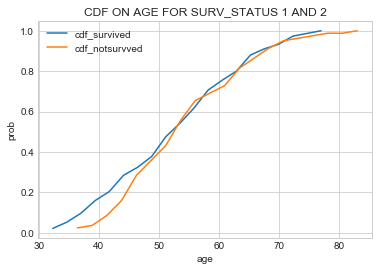

In [105]:

counts, bin_edges = np.histogram(hb_1['age'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
#plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf,label='cdf_survived')





counts, bin_edges = np.histogram(hb_2['age'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
#plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf,label='cdf_notsurvved')
plt.title('CDF ON AGE FOR SURV_STATUS 1 AND 2')
plt.xlabel('age')
plt.ylabel('prob')
plt.legend()



plt.show();

### from the above graph,If age < 35 then status1.If  Age > 78 then status2.(since cdf forstatus 2 is almost zero at 35 and cdf for Status2 is 1 at 78 )

[0.10666667 0.08       0.         0.10666667 0.         0.10222222
 0.         0.07111111 0.         0.09777778 0.10222222 0.
 0.06666667 0.         0.09777778 0.         0.09333333 0.
 0.04444444 0.03111111]
[58.   58.55 59.1  59.65 60.2  60.75 61.3  61.85 62.4  62.95 63.5  64.05
 64.6  65.15 65.7  66.25 66.8  67.35 67.9  68.45 69.  ]
[0.14814815 0.11111111 0.         0.04938272 0.         0.03703704
 0.         0.08641975 0.         0.09876543 0.09876543 0.
 0.16049383 0.         0.07407407 0.         0.04938272 0.
 0.03703704 0.04938272]
[58.   58.55 59.1  59.65 60.2  60.75 61.3  61.85 62.4  62.95 63.5  64.05
 64.6  65.15 65.7  66.25 66.8  67.35 67.9  68.45 69.  ]


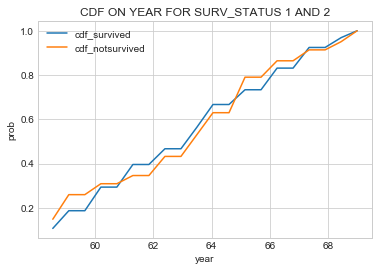

In [106]:
#status1
counts, bin_edges = np.histogram(hb_1['year'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
#plt.plot(bin_edges[1:],pdf,label='pdf_survived')
plt.plot(bin_edges[1:], cdf,label='cdf_survived')


#status2
counts, bin_edges = np.histogram(hb_2['year'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
#plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf,label='cdf_notsurvived')
plt.title('CDF ON YEAR FOR SURV_STATUS 1 AND 2')
plt.xlabel('year')
plt.ylabel('prob')
plt.legend()

plt.show();

### From above graph no conclusons can be drawn, since thereis a continuous overlap of both survival status 1 and status2   

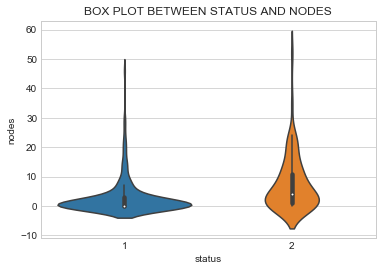

In [99]:
sns.violinplot(x="status", y="nodes", data=hb, size=8)
plt.title('BOX PLOT BETWEEN STATUS AND NODES')
plt.show()


No conclusioin can be drawn from the above violin graph.Nodes cannot be negative and hence everything below zero does not give any further information.

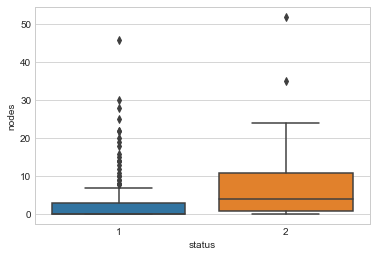

In [25]:
sns.boxplot(x='status',y='nodes', data=hb)
plt.show()

### From above box plot,when no : of nodes is greater than 7,then survival status is 2 (neglecting  outliers)

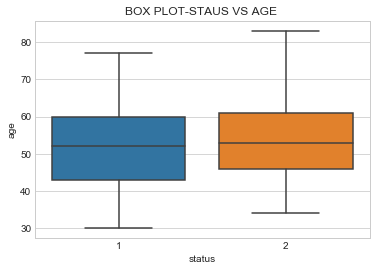

In [100]:
sns.boxplot(x='status',y='age', data=hb)
plt.title('BOX PLOT-STAUS VS AGE ')
plt.show()

###  If age < 33 then survival status is 1
### If age >78  then survival status 2 .No further conclusion can be drawn